# Práctica 1: Paseos aleatorios
## Antonio Sevilla

### Ejercicio 1

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as stats

In [2]:
def galton_box_1(num_pasos):
    """
    devuelve una lista cuyo primer valor es 0 y los demás la posición de la bola en cada paso de la simulación de la máquina de Galton
    el valor 0 representa el centro del tablero, el +i la posición de i espacios a la derecha y el -i ídem a la izquierda
    num_pasos determina la cantidad de pasos
    """
    # se crea una lista vacía de posiciones
    situacion_bola = np.zeros(num_pasos + 1, dtype=int)
    for j in range(1, num_pasos + 1):
        # en cada iteración se genera una variable aleatoria uniforme [0,1]
        random_value = random.random()
        # esta se transforma en Z, se le suma a la posición del paso anterior y se añade a la lista
        while random_value == 0.5:
                random_value = random.random()
        if random_value > 0.5:
            situacion_bola[j]=situacion_bola[j-1] + 1
        else:
            situacion_bola[j]=situacion_bola[j-1] - 1
    return list(situacion_bola)

In [3]:
galton_box_1(20)

[0, -1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 0, 1, 2, 1, 2, 3, 2, 3, 2]

In [4]:
def galton_box_n(num_bolas, num_pasos):
    """
    devuelve una matriz que guarda num_bolas simulaciones como listas con el formato de galton_box_1
    """
    situacion_bolas = []
    for i in range(num_bolas):
        situacion_bolas.append(galton_box_1(num_pasos))
    return situacion_bolas

In [5]:
galton_box_n(1000,500)

[[0,
  -1,
  0,
  1,
  2,
  1,
  0,
  -1,
  -2,
  -1,
  -2,
  -3,
  -4,
  -3,
  -4,
  -3,
  -4,
  -3,
  -2,
  -1,
  0,
  1,
  0,
  -1,
  -2,
  -1,
  -2,
  -1,
  -2,
  -1,
  0,
  1,
  0,
  -1,
  0,
  -1,
  0,
  1,
  0,
  -1,
  0,
  -1,
  -2,
  -1,
  0,
  1,
  0,
  -1,
  -2,
  -1,
  -2,
  -3,
  -4,
  -3,
  -2,
  -3,
  -2,
  -3,
  -2,
  -1,
  -2,
  -3,
  -2,
  -3,
  -2,
  -1,
  -2,
  -3,
  -4,
  -3,
  -4,
  -3,
  -2,
  -3,
  -2,
  -3,
  -4,
  -3,
  -2,
  -3,
  -4,
  -5,
  -6,
  -5,
  -6,
  -5,
  -4,
  -3,
  -2,
  -1,
  -2,
  -3,
  -4,
  -3,
  -2,
  -3,
  -2,
  -3,
  -4,
  -3,
  -4,
  -3,
  -4,
  -5,
  -6,
  -5,
  -6,
  -7,
  -8,
  -7,
  -6,
  -5,
  -6,
  -5,
  -6,
  -5,
  -6,
  -5,
  -6,
  -7,
  -8,
  -7,
  -8,
  -9,
  -10,
  -11,
  -10,
  -11,
  -12,
  -11,
  -12,
  -11,
  -12,
  -13,
  -12,
  -13,
  -14,
  -15,
  -14,
  -13,
  -14,
  -15,
  -14,
  -13,
  -12,
  -13,
  -12,
  -13,
  -12,
  -13,
  -14,
  -15,
  -14,
  -13,
  -14,
  -13,
  -12,
  -13,
  -14,
  -13,
  -14,
  -13,
  -12,
  -

In [6]:
def galton_box_n_plot(num_bolas, num_pasos):
    """
    representa num_bolas realizaciones de num_pasos pasos sobre una misma gráfica
    """
    for k in range(num_bolas):
        # en cada iteración generamos una simulación y la representamos contra el vector tiempo en pasos
        plt.plot(list(range(num_pasos + 1)), galton_box_1(num_pasos))
        plt.ylabel("Posición"); plt.xlabel("Paso")

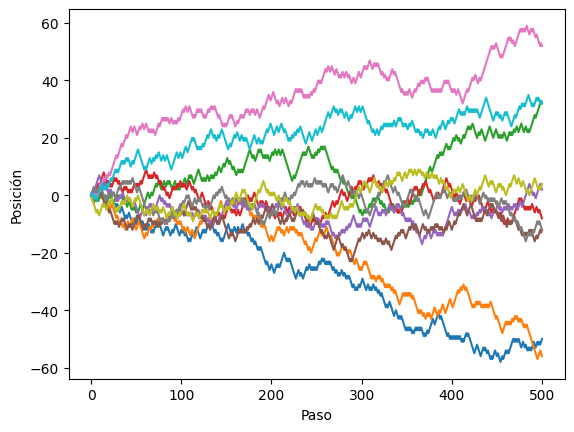

In [7]:
galton_box_n_plot(10,500)

### Ejercicio 2

In [8]:
def galton_box_end(num_bolas, num_pasos):
    """
    devuelve una lista con la última posición de num_bolas simulaciones de num_pasos pasos
    """
    # situacion_bolas almacena la posición de cada bola
    situacion_bolas = np.zeros(num_bolas, dtype=int)
    for i in range(num_bolas):
        for j in range(num_pasos):
            # para cada bola y cada instante se genera una uniforme [0,1]
            random_value = random.random()
            # se transforma en Z, se suma al valor anterior y en lugar de almacenar la posición en cada paso, esta se sobreescribe
            while random_value == 0.5:
                random_value = random.random()
            if random_value > 0.5:
                situacion_bolas[i]=situacion_bolas[i] + 1
            else:
                situacion_bolas[i]=situacion_bolas[i] - 1
    return list(situacion_bolas)

In [9]:
def galton_box_end_plot_norm(num_bolas, num_pasos, bins_):
    """
    representa en un histograma la frecuencia relativa de las posiciones finales de num_bolas simulaciones de num_pasos pasos agrupadas en bins_ intervalos
    y encima normales centradas en 0 con ditintas distribuciones
    """
    # almacenamos la posición final de una simulación
    situacion_bolas = galton_box_end(num_bolas, num_pasos)
    # el método plt.hist representa los valores agrupados automáticamente en bins_ intervalos
    # estos son consecutivos, de igual longitud y están entre el mínimo y el máximo de los valores tomados en la lista que se pasa como parámetro
    # si se incluye el parámetro density = True, representa la frecuencia relativa
    plt.hist(situacion_bolas, bins = bins_, density = True)
    # generamos un vector uniforme entre el mínimo y el máximo de los valores tomados en la simulación
    x = np.linspace(min(galton_box_end(num_bolas, num_pasos)), max(galton_box_end(num_bolas, num_pasos)), num_bolas)
    for s in range(20, 60, 10):
        # para cada varianza a estudiar, representamos una normal centrada en 0 y de media s contra el vector uniforme x
        plt.plot(x, stats.norm.pdf(x,0,s))
        plt.ylabel("Frecuencia relativa"); plt.xlabel("Posición"); plt.legend(["s = 20", "s = 30", "s = 40", "s = 50"])

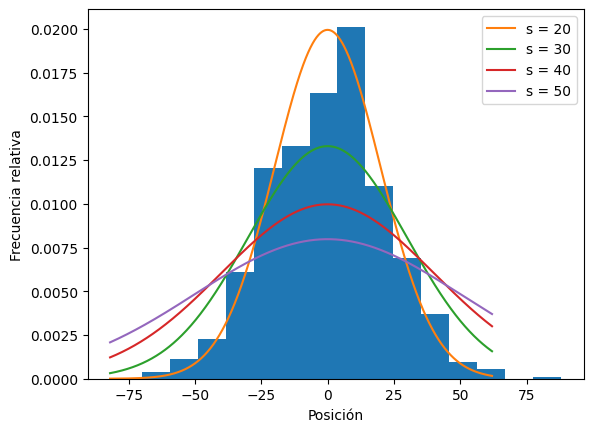

In [10]:
galton_box_end_plot_norm(1000, 500, 15)

### Ejercicio 3

In [118]:
def aprox_sigma_log(num_bolas, num_pasos, bins_):
    situacion_bolas = galton_box_end(num_bolas, num_pasos)
    # el método np.histogram agrupa los valores automáticamente similarmente a plt.hist
    # devuelve las frecuencias absolutas y los extremos de los intervalos
    frecuencias, extremos = np.histogram(situacion_bolas, bins=bins_)
    # obtenemos representantes de los intervalos como la semisuma de sus extremos
    media_intervalos = []
    for i in range(len(extremos)-1):
        media_intervalos.append((extremos[i+1]+extremos[i])/2)
    # obtenemos el vector de los logaritmos de las frecuencias relativas
    frecuencias = np.log(frecuencias/num_bolas)
    # representamos los logaritmos de las frecuencias relativas contra los cuadrados de los representantes de los intervalos
    # resulta una función con 2 ramas, al no ser el cuadrado inyecivo
    plt.plot(np.array(media_intervalos)**2,frecuencias, "-" )
    plt.ylabel("log(frecuencia relativa)"); plt.xlabel("posición^2")

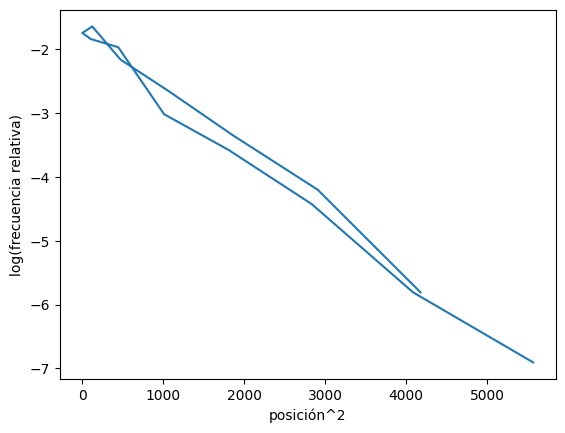

In [128]:
aprox_sigma_log(1000,500,14)

### Ejercicio 4

In [14]:
def galton_box_end_plot_norm_good(num_bolas, num_pasos, bins_):
    """
    representa en un histograma la frecuencia relativa de las posiciones finales de num_bolas simulaciones de num_pasos pasos agrupadas en bins_ intervalos
    y encima la Gaussiana ajustada
    """
    # repetimos el proceso del ejercicio 3
    situacion_bolas = sorted(galton_box_end(num_bolas, num_pasos))
    plt.hist(situacion_bolas, bins = bins_, density = True)
    # el paquete numpy dispone de métodos que calculan de forma la media y la cuasi-desviación
    mu, s = np.mean(situacion_bolas), np.std(situacion_bolas)
    x = np.linspace(min(situacion_bolas), max(situacion_bolas), num_pasos)
    # representamos una normal con los parámetros estimados
    plt.plot(x, stats.norm.pdf(x,mu,s), "r-")
    plt.ylabel("Frecuencia relativa"); plt.xlabel("Posición"); plt.legend(["Gaussiana ajustada"])

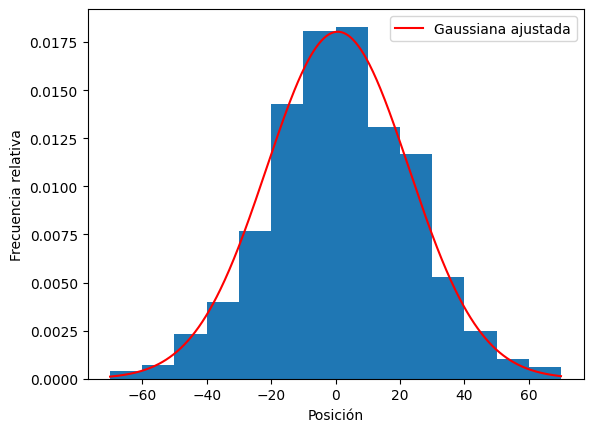

In [131]:
galton_box_end_plot_norm_good(1000, 500, 14)

### Ejercicio 5

In [120]:
def ley_potencias(num_bolas, num_pasos):
    """
    representa la evolución de la media y la desviación típica de la posición al aumentar el número de pasos de las realizaciones
    """
    sigmas, mus = [], []
    for i in range(1, num_pasos + 1):
        # para cada número de pasos posible, realizamos una simulación
        situacion_bolas = galton_box_end(num_bolas, i)
        # calculamos los estimadores de esta
        s, mu = np.std(situacion_bolas), np.mean(situacion_bolas)
        # los almacenamos
        sigmas.append(s); mus.append(mu)
    # genermos un vector de pasos posibles
    n = list(range(1,num_pasos + 1))
    # calculamos la regresión pedida como ley de potencias
    fit = np.polyfit(np.log(n),  np.log(sigmas), 1)
    # representamos las medias, las desviaciones, la raíz de n y la estimación contra el número de pasos realizados
    plt.plot(n, mus, "blue")
    plt.plot(n, sigmas, "orange")
    plt.plot(n, np.sqrt(n), "purple")
    plt.plot(n, np.exp(fit[1]) * n**fit[0], "green")
    plt.xlabel("Pasos en la realización"); plt.legend(["mu_n", "s_n", "√n", "e^" + str(round(fit[1], 6)) + " * n^" + str(round(fit[0],6))], fontsize = 9)
    

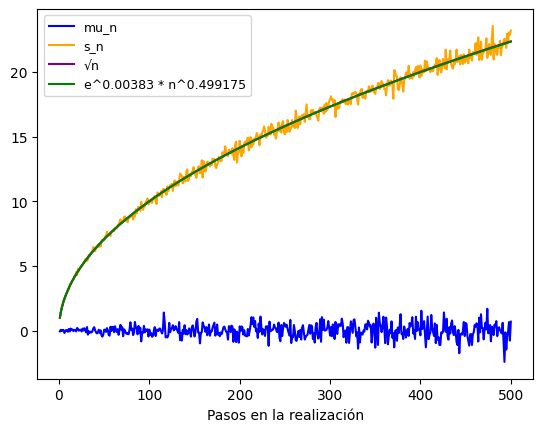

In [17]:
ley_potencias(1000, 500)

### Ejercicio 6

#### 6.ii

La esperanza de una variable aleatoria discreta es la suma de los elementos de su soporte multiplicados por su probabilidad

$E[Z] = 1\cdot\frac{1}{2} + (-1)\cdot\frac{1}{2} = 0$

La varianza de una variable aleatoria discreta se calcula como la suma de los cuadrados de las diferencias entre los elementos de su soporte y la esperanza multiplicados por su probabilidad

$V[Z] = (1 - 0)^2\cdot\frac{1}{2} + (-1 - 0)^2\cdot\frac{1}{2} = \frac{1}{2} + \frac{1}{2} = 1$

Para calcular $E[X_n]$ podemos aplicar que la esperanza es un operador lineal

$E[X_n] = E[\sum_{k=0}^{n-1}{Z_k}] = \sum_{k=0}^{n-1}{E[Z_k]} = \sum_{k=0}^{n-1}{0} = 0$

La varianza también es lineal para variables independientes, $Z_n$ lo son entre ellas

$V[X_n] = V[\sum_{k=0}^{n-1}{Z_k}] = \sum_{k=0}^{n-1}{V[Z_k]} = \sum_{k=0}^{n-1}{1} = n$

#### 6.iii

Conocemos los estimadores de $Z_1$ gracias a 6.ii

Sabemos que si una variable aleatoria $Y$ se distribuye como $N(\mu,\sigma^2)$, entonces $kY \sim N(\mu,k\sigma^2) \ \ \forall\ k$

Trivialmente, esta propiedad se cumple también asintóticamente

$\frac{X_n -\ n\cdot E[Z_1]}{\sqrt{n}\cdot \sigma[Z_1]} = \frac{X_n}{\sqrt{n}} \approx N(0,1) \Rightarrow X_n = \sqrt{n}\frac{X_n}{\sqrt{n}} \approx N(0,n)\ \ \ \square$

### Ejercicio 7

En 6.iii dedujimos que $X_n \approx N(0,n)$

Por la propiedad usada en 6.iii, $N(0,n) \sim \sqrt{n}N(0,1)$

Otra propiedad de la normal es que $N(0,1) \sim \frac{N(\mu,\sigma^2)\ -\ \mu}{\sigma}\ \ \forall\ \mu, \sigma$

De esta manera, podemos escribir:

$W^h(t_n) = W^h(n\tau_h) = hX_n \approx hN(0,n) \approx h\sqrt{n}N(0,1) \approx h\sqrt{n}\frac{N(0,n\tau_h)\ -\ 0}{\sqrt{n\tau_h}} \approx h\frac{N(0,t_n)}{\sqrt{\tau_h}}\ \ \ \square$

In [121]:
def browniano(h_base, h_exp):
    """
    representa la función W^h(t) siendo h = h_base^h_exp
    """
    # calculamos la h y el número de pasos a simular
    h = math.pow(h_base, h_exp); num_pasos = int(1/h**2)
    # generamos una lista de los num_pasos intervalos consecutivos y de igual longitud entre 0 y 1
    n = list(np.array(range(num_pasos+1))/num_pasos)
    # intercalamos un valor artificalmente cercano al anterior en el vector de tiempo excepto en el primero
    for j in range(1,num_pasos*2,2):
        n.insert(j, n[j]+0.001)
    # realizamos una simulación
    situacion_bolas, w = galton_box_1(num_pasos), []
    for k in range(num_pasos):
        for l in range(2):
            # intercalamos un valor igual al anterior en el vector de posiciones
            w.append(situacion_bolas[k]*h)
    # duplicamos el último valor del vector de posiciones
    w.append(w[-1])
    # de esta manera obtenemos bordes cuadrados a la hora de representar, como resultan en una función definida a trozos como constantes
    # con un coste computacional mucho menor que generar muchos valores intermedios en cada intervalo de definición
    plt.plot(n, w)

In [122]:
def browniano_plot_pedido():
    for i in range(-2, -9, -1):
        browniano(2, i)
    plt.xlabel("t"); plt.legend(["h = 2^-2", "h = 2^-3","h = 2^-4","h = 2^-5","h = 2^-6","h = 2^-7","h = 2^-8"], fontsize=7)

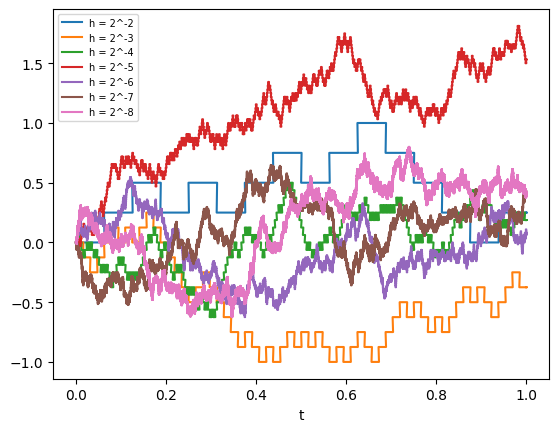

In [123]:
browniano_plot_pedido()